In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("Salary_Data.csv")

X = data["YearsExperience"].values
Y = data["Salary"].values

print(X)
print(Y)


[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]
[[ 1.   1.1]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.2]
 [ 1.   3.7]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   5.1]
 [ 1.   5.3]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.8]
 [ 1.   7.1]
 [ 1.   7.9]
 [ 1.   8.2]
 [ 1.   8.7]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.   9.6]
 [ 1.  10.3]
 [ 1.  10.5]]


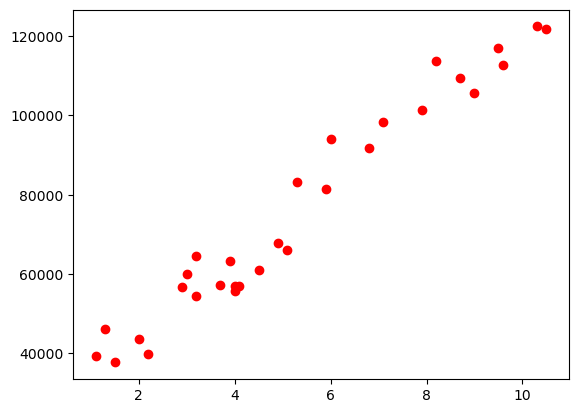

In [15]:
from matplotlib import pyplot as plt

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

print(X)
print(Y)

plt.plot(X.T, Y.T, 'ro')

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

print(Xbar)

w =  [[25792.20019867]
 [ 9449.96232146]]
MSE:  31270951.72228097
r2:  0.9569566641435086


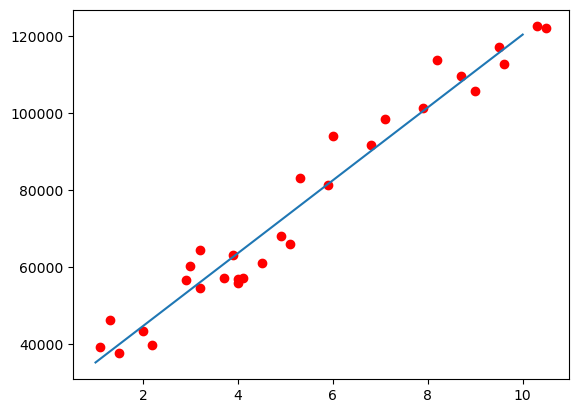

In [14]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]

x0 = np.linspace(1, 10, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, Y.T, 'ro')     # data               # the fitting line
plt.plot(x0, y0)     # data               # the fitting line

y0 = np.dot(Xbar, w)

mse = np.mean((Y - y0) ** 2)
r2 = 1 - (np.sum((Y - y0) ** 2) / np.sum((Y - np.mean(Y)) ** 2))

print("MSE: ", mse)
print("r2: ", r2)

plt.show()

# Gradient descent

Gradient Descent Results:
Theta: [[22920.48554852]
 [ 9876.11275288]]
MSE:  33053746.30651365
r2:  0.9545027117747489


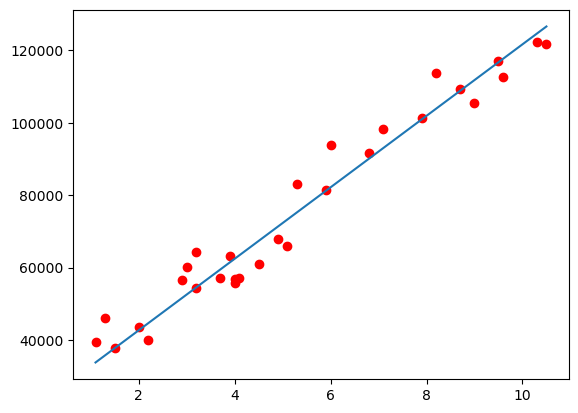

In [9]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

# Gradient Descent function
def predict(X, theta):
    return np.dot(X, theta)

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        theta = theta - (learning_rate / m) * np.dot(X.T, errors)
    return theta

# Initialize theta with correct size (2 parameters: intercept + slope)
theta = np.zeros((Xbar.shape[1], 1))  # [0, 0]
learning_rate = 0.01
iterations = 1000

# Run Gradient Descent with Xbar (not X)
theta = gradient_descent(Xbar, Y, theta, learning_rate, iterations)

y0 = predict(Xbar, theta)

print("Gradient Descent Results:")
print(f"Theta: {theta}")

mse = np.mean((Y - y0) ** 2)
r2 = 1 - (np.sum((Y - y0) ** 2) / np.sum((Y - np.mean(Y)) ** 2))

print("MSE: ", mse)
print("r2: ", r2)

# Plotting
plt.plot(X.T, Y.T, 'ro')
x0 = np.linspace(min(X), max(X), 2)
y0 = theta[0] + theta[1] * x0
plt.plot(x0, y0)
plt.show()